In [273]:
# This prevents the notebook from not updating when external files are changed.
%load_ext autoreload
%autoreload 2

from aux import aux, plot
import copy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math as m
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Analysis

In [274]:
original_df = pd.read_csv('./data/Iris.csv', sep=',')
df = cp.deepcopy(original_df)
display(df.head())

# Features and target
target_names = df['species'].unique()
print(f'Categories: {target_names}')

target = 'species'
features = [i for i in df.columns if i not in target]

print(f'Target: [\'{target}\']')
print(f'Features: {features}')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Categories: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Target: ['species']
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [275]:
# Checking dtypes
display(df.info())

print(f'Peak-to-peak from features: \n{np.ptp(df[features], axis=0)}')

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

Peak-to-peak from features: 
sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


X_train shape: (120, 4)
Y_train shape: (120,)


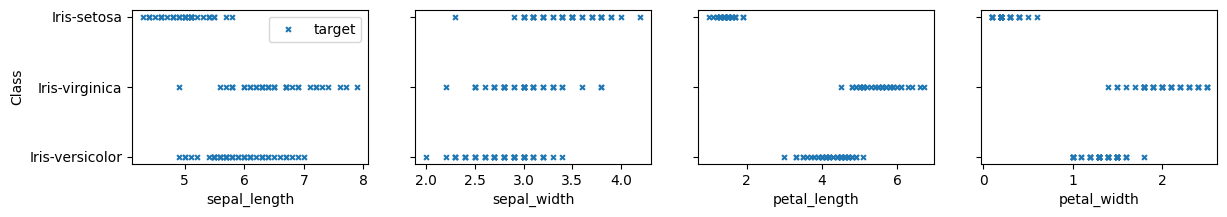

In [276]:
X = df[features]
Y = df[target]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=100)
X_train.reset_index(drop=True,inplace=True)
Y_train.reset_index(drop=True,inplace=True)

X_test.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')

def logistic_plot_features(X_train, Y_train):
    features = X_train.columns
    X_train = X_train.to_numpy()
    Y_train = Y_train.to_numpy()

    n_features = X_train.shape[1]
    fig, ax = plt.subplots(1,n_features, figsize=(14,2), sharey=True)
    for i in range(n_features):
        ax[i].scatter(X_train[:,i], Y_train, marker='x', color='tab:blue', s=12)
        ax[i].set_xlabel(features[i])

    ax[0].set_ylabel('Class')
    ax[0].legend(['target'], loc='upper right')

plot.logistic_plot_features(X_train, Y_train)

### Exploratory Data Analysis

### Data Preprocessing

In [277]:
# Replace class names with integers
# Create 3 diferente training targets due to multiclass logistic regression

Y_train_targets = np.zeros((Y_train.shape[0], len(target_names)))
for i in range(len(target_names)):
  Y_train_copy = Y_train.copy()
  arr= np.zeros(len(target_names)) # Generates a [1, 0, 0] kind vector varying the position of the 1
  arr[i] = 1 # Generates a [1, 0, 0] kind vector varying the position of the 1
  Y_train_copy.replace(target_names, arr, inplace=True) 
  Y_train_targets[:,i] = Y_train_copy 

print(f'Before:\n{Y_train}', '\n')
print(f'After:\n{Y_train_targets}','\n')

# Y_train_0 = Y_train.copy()
# Y_train_1 = Y_train.copy()
# Y_train_2 = Y_train.copy()
# Y_train_0.replace(target_names, [1, 0, 0], inplace=True)
# Y_train_1.replace(target_names, [0, 1, 0], inplace=True)
# Y_train_2.replace(target_names, [0, 0, 1], inplace=True)
# asd = np.vstack([Y_train_0,Y_train_1, Y_train_2]).transpose()


Before:
0      Iris-versicolor
1      Iris-versicolor
2       Iris-virginica
3          Iris-setosa
4          Iris-setosa
            ...       
115    Iris-versicolor
116     Iris-virginica
117    Iris-versicolor
118        Iris-setosa
119        Iris-setosa
Name: species, Length: 120, dtype: object 

After:
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

### Feature Mapping

### Feature Scalling

In [278]:
# Apply z-score normalization on all features

print('Training Set:')
x_train_norm, x_train_mean, x_train_std = aux.zscore_normalization(X_train)
display(pd.DataFrame(x_train_norm, columns=X_train.columns).describe())

print('Test Set:')
x_test_norm, x_test_mean, x_test_std = aux.zscore_normalization(X_test)
display(pd.DataFrame(x_test_norm, columns=X_test.columns).describe())

Training Set:


,sepal_length,sepal_width,petal_length,petal_width
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-1.006602e-15,-1.776357e-16,8.881784e-17,-1.036208e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.861750e+00,-2.426168e+00,-1.591349e+00,-1.460636e+00
25%,-8.615934e-01,-5.702946e-01,-1.256072e+00,-1.191807e+00
50%,-1.114758e-01,-1.063261e-01,3.036925e-01,1.523362e-01
75%,6.698967e-01,5.896266e-01,7.993187e-01,8.244078e-01
max,2.638955e+00,2.677485e+00,1.732262e+00,1.765308e+00


Test Set:


,sepal_length,sepal_width,petal_length,petal_width
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-4.736952e-16,-5.181041e-16,-3.774758e-16,6.661338e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.532319e+00,-2.038688e+00,-1.343219e+00,-1.394829e+00
25%,-9.126314e-01,-6.016430e-01,-1.186829e+00,-1.121134e+00
50%,1.014035e-01,-1.992703e-01,3.510093e-01,1.256968e-01
75%,6.929238e-01,6.054751e-01,8.201802e-01,8.859597e-01
max,1.847797e+00,3.019711e+00,1.576067e+00,1.281296e+00


### Model Training


Sigmoid:

![Alt text](images/sigmoid.png)

Regularized cost function:

![Alt text](images/regularizedcostlogistic.png)

Loss:

![Alt text](images/loss.png)

Regularized gradient descent:

![Alt text](images/regularizedlineargradientdescent.png)

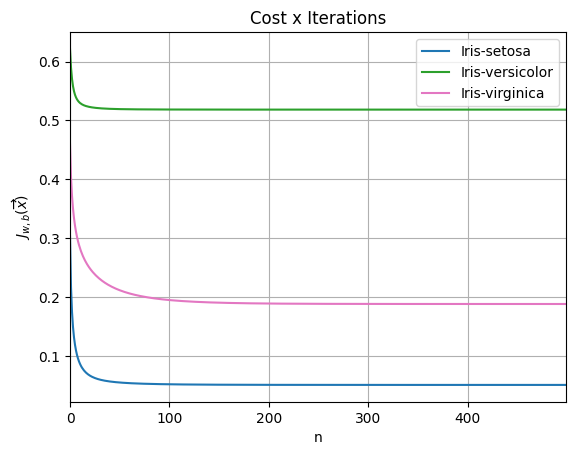

My library: 
Result for Iris-setosa : [[-1.00412955  1.15160401 -1.67239909 -1.56246653]] [[-2.429735362576786]]
Result for Iris-versicolor : [[ 0.30384081 -1.24956689  0.56764664 -0.69013622]] [[-0.748366622615271]]
Result for Iris-virginica : [[ 0.17128165 -0.4756636   2.30107465  2.8533909 ]] [[-3.736991576944138]]

Sklearn: 
Result for Iris-setosa : [[-1.00832134  1.15016521 -1.67315269 -1.56460396]] [[-2.43916254]]
Result for Iris-versicolor : [[ 0.30346157 -1.2493803   0.56875886 -0.69085113]] [[-0.74837284]]
Result for Iris-virginica : [[ 0.1708575  -0.47986605  2.31537111  2.85772694]] [[-3.75266999]]


In [279]:
initial_w = np.zeros(len(features))
initial_b = 0

J_history = []
W_norm = []
B_norm = []

time0 = time.time()
for i in range(len(target_names)): # For each class
    w_norm, b_norm, j_history = aux.gradient_descent(
        x_train_norm, 
        Y_train_targets[:,i], 
        initial_w, 
        initial_b, 
        aux.logistic_compute_gradient, 
        aux.logistic_compute_cost, 
        n_iters = 500, 
        alpha = 1,
        lambda_ = 1)
    W_norm.append(w_norm)
    B_norm.append(b_norm)
    J_history.append(j_history)

time1 = time.time()
elapsedTime = time1 - time0

colors = ['tab:blue', 'tab:green', 'tab:pink']
for i in range(len(target_names)):
    plt.plot(J_history[i], color= colors[i])
    plt.title('Cost x Iterations')
    plt.xlabel('n')
    plt.ylabel('$J_{w,b}(\overrightarrow{x})$')
    plt.xlim([0,len(j_history) - 1])
    plt.grid()

plt.legend(target_names)
plt.show()

# print(f'\nFound w: {w_norm} \nFound b: {b_norm}')
# print(f'Elapsed time: {elapsedTime:.3f}')

print('My library: ')
for i in range(len(W_norm)):
    print(f'Result for {target_names[i]} : [{W_norm[i]}] [[{B_norm[i]}]]')

print('\nSklearn: ')
for i in range(len(W_norm)):
    lr_model = LogisticRegression()
    lr_model.fit(x_train_norm, Y_train_targets[:,i])
    print(f'Result for {target_names[i]} : {lr_model.coef_} [{lr_model.intercept_}]')

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


### Model Evaluation

In [297]:
p = aux.logistic_prediction(x_test_norm, W_norm,B_norm, target_names)
accuracy = np.mean(p == Y_test) * 100
print(f'Accuracy on test set: {accuracy/100*Y_test.shape[0]:g} out of {Y_test.shape[0]:g} ({accuracy:.1f}) %')

Accuracy on test set: 28 out of 30 (93.3) %
